In [19]:
import serial
import io
import time
import os
import sys

In [20]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import datetime as dt

%matplotlib notebook

In [28]:
if 'ser' in locals():
    ser.close()
import serial, sys
port = "COM7"
baudrate = 9600
timeout = 0.001
ser = serial.Serial(port,baudrate,timeout=timeout) # this should only be executed once
sio = io.TextIOWrapper(io.BufferedRWPair(ser, ser))
print(ser)
print('com3 is open', ser.isOpen())

Serial<id=0x1aac6ebda60, open=True>(port='COM7', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=0.001, xonxoff=False, rtscts=False, dsrdtr=False)
com3 is open True


In [31]:
if 'ser' in locals():
    ser.close()

In [30]:
# sio.flush()
sio.read()

't:-1228.50\nt:-300.00\nt:-1228.50\nt:-29.00\nt:-1228.50\nt:-29.00\nt:-1228.50\nt:-29.00\nt:-1228.50\nt:-29.00\nt:-1228.50\nt:-4.00\nt:-1253.50\nt:-29.00\nt:-1253.50\nt:-29.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-29.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-29.10\nt:-1253.50\nt:-300.00\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1253.50\nt:-4.10\nt:-1278.50\nt:-4.10\nt:-1278.50\nt:-4.10\n'

<IPython.core.display.Javascript object>


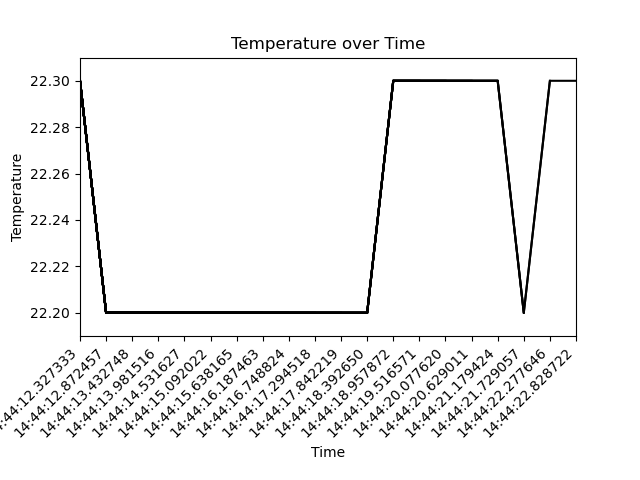

In [32]:
# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []


# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    sio.flush()    # it is buffering. required to get the data out *now*

    # Read temperature
    temp_c = float(sio.read()[-6:-1])

    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(temp_c)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]
    
    ymin, ymax = min(ys), max(ys)
    yrange = ymax - ymin
    
    ax.set_xlim(xs[0],xs[-1])
    ax.set_ylim(ymin - yrange*0.1, ymax + yrange*0.1)

    # Draw x and y lists
    ax.plot(xs, ys, color="black")

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Temperature over Time')
    plt.ylabel('Temperature')
    plt.xlabel('Time')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=500)
plt.show()